Datensatzanalyse vom Datensatz [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors) in Kaggle

In [ ]:
import kagglehub
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

filename = path + "/StudentPerformanceFactors.csv"
print("Dataset file: ", filename)

100%|██████████| 93.9k/93.9k [00:00<00:00, 23.3MB/s]

Extracting files...
Dataset file:  /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8/StudentPerformanceFactors.csv


In [ ]:
import pandas as pd

df = pd.read_csv(filename)
# Grundlegende Infos zum Datensatz auslesen
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


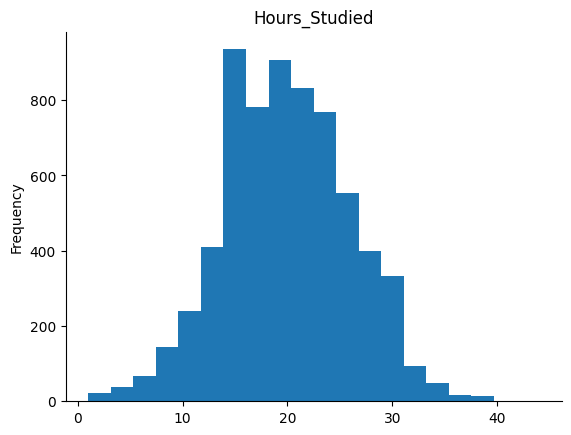

In [ ]:
# @title Hours_Studied

from matplotlib import pyplot as plt
df['Hours_Studied'].plot(kind='hist', bins=20, title='Hours_Studied')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Verteilungen - ein paar Statistik-Werte
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [ ]:
df.count()

,0
Hours_Studied,6607
Attendance,6607
Parental_Involvement,6607
Access_to_Resources,6607
Extracurricular_Activities,6607
Sleep_Hours,6607
Previous_Scores,6607
Motivation_Level,6607
Internet_Access,6607
Tutoring_Sessions,6607


In [ ]:
df['Hours_Studied'].value_counts()

,count
Hours_Studied,
20,465
19,441
21,431
23,411
22,402
18,401
17,381
24,357
16,351


<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

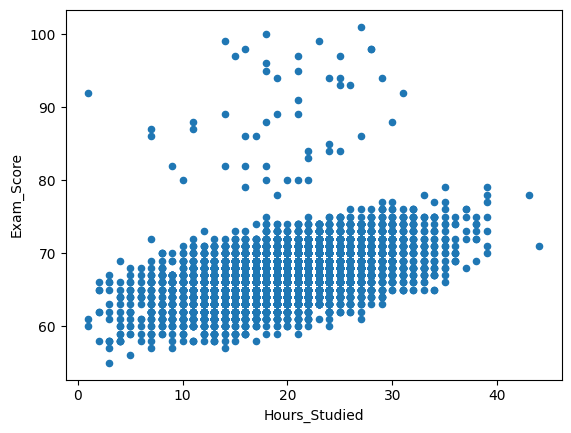

In [ ]:
df.plot.scatter(x='Hours_Studied', y='Exam_Score')

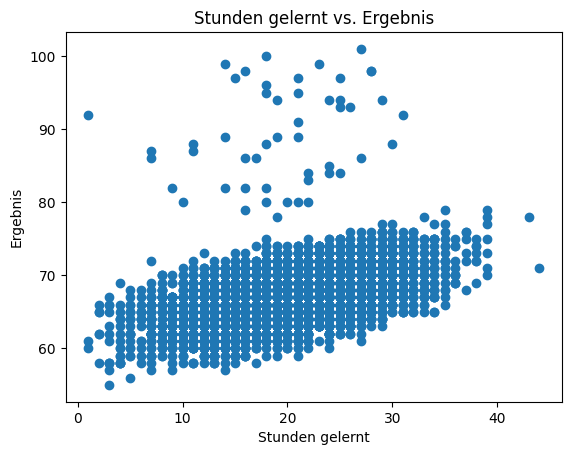

In [ ]:
import matplotlib.pyplot as plt

# Daten für den Plot vorbereiten
x = df['Hours_Studied']
y = df['Exam_Score']

# Plot erstellen
plt.scatter(x, y)
plt.xlabel('Stunden gelernt')
plt.ylabel('Ergebnis')
plt.title('Stunden gelernt vs. Ergebnis')
plt.show()

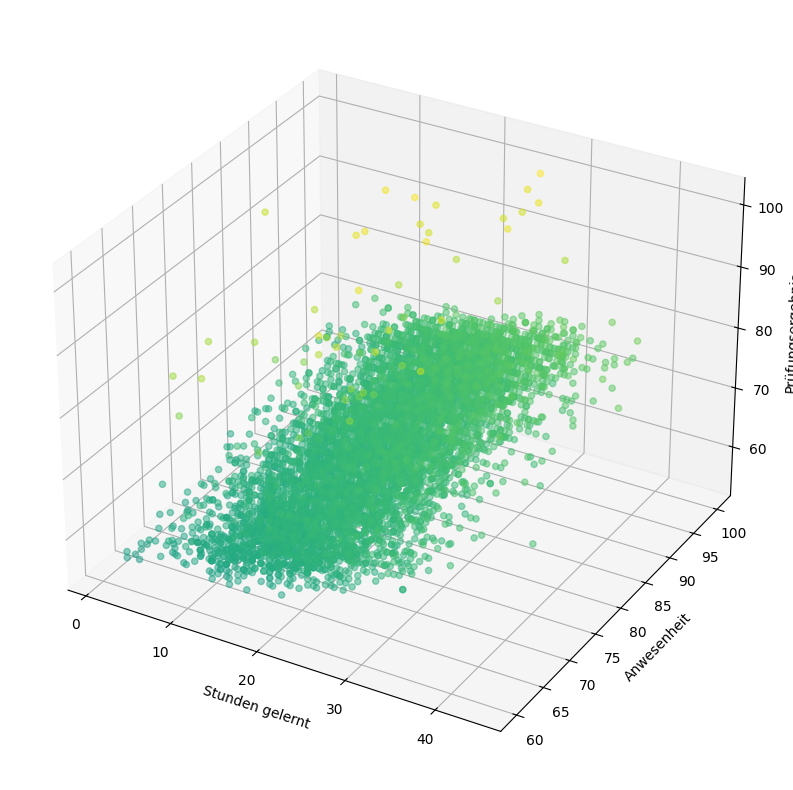

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
# Einen 3D Scatter Plot mit Pandas erstellen
fig = plt.figure(figsize=(10,8))
# Farbverlauf
colors = cm.viridis(df['Exam_Score'] / df['Exam_Score'].max())
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hours_Studied'], df['Attendance'], df['Exam_Score'], c=colors, alpha=0.5)
ax.set_xlabel('Stunden gelernt')
ax.set_ylabel('Anwesenheit')
ax.set_zlabel('Prüfungsergebnis')
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

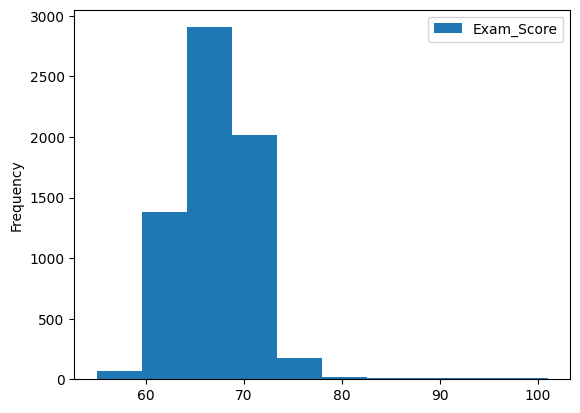

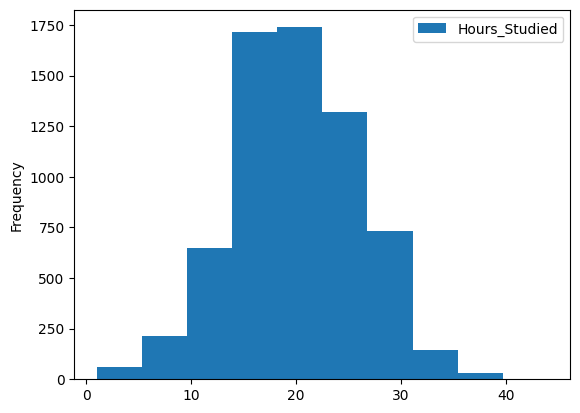

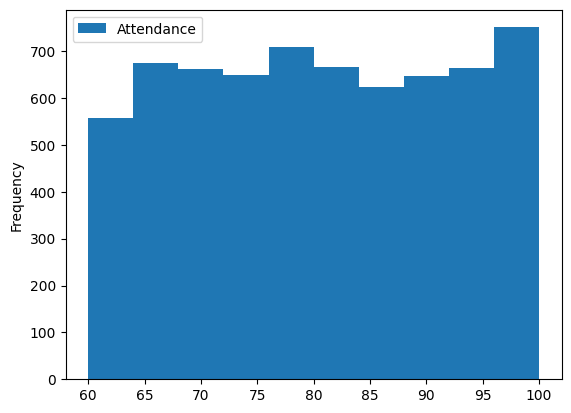

In [ ]:
df.plot.hist(y='Exam_Score')
df.plot.hist(y='Hours_Studied')
df.plot.hist(y='Attendance')

In [ ]:
print(df['Family_Income'].value_counts())
print(df['Family_Income'].nunique())

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
3


Folgender Code ist nicht Teil der Werkstatt und dient zur Analyse um gute Werte für die Übungen zu finden. Ich lasse ihn aber für Dich, lieber Leser, da, für den Fall dass es dich interessiert. Die Korrelation, die hier verwendet wird, werden wir in einem späteren Kapitel behandeln.

In [ ]:
categorical_cols = df.select_dtypes(exclude=['int64']).columns.tolist()

df1 = pd.get_dummies(df, columns=categorical_cols)

correlation_matrix = df1.corr()
#print(correlation_matrix)

exam_score_corr = correlation_matrix['Exam_Score'].abs()

# Top 3 Korrelationen (ohne 'Exam_Score' selbst) finden
top_3_corr = exam_score_corr.drop('Exam_Score').nlargest(3)

# Ergebnis ausgeben
print(top_3_corr)

Attendance         0.581072
Hours_Studied      0.445455
Previous_Scores    0.175079
Name: Exam_Score, dtype: float64


Code aus der Wohnung

In [ ]:
print('Summe:', df['Tutoring_Sessions'].sum())
print('Durchschnitt:', df['Tutoring_Sessions'].mean())
print('Max:', df['Tutoring_Sessions'].max())
print('Median:', df['Tutoring_Sessions'].median())

Summe: 9869
Durchschnitt: 1.4937187831088239
Max: 8
Mittlere Student: 1.0


In [ ]:
df['Tutoring_Sessions'].describe()

,Tutoring_Sessions
count,6607.000000
mean,1.493719
std,1.230570
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


<Axes: ylabel='Frequency'>

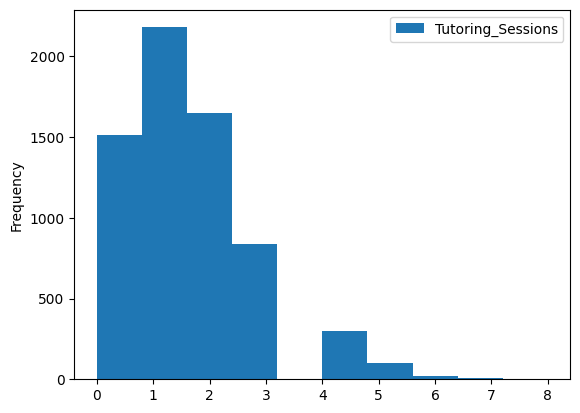

In [ ]:
df.plot.hist(y='Tutoring_Sessions')

<Axes: xlabel='Tutoring_Sessions', ylabel='Exam_Score'>

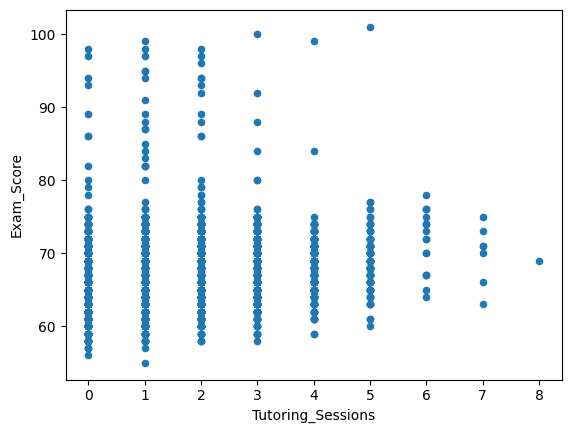

In [ ]:
df.plot.scatter(x='Tutoring_Sessions',y='Exam_Score')